# Data Description

* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

# 반드시 들어가야 하는 내용.


* 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
* 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Section1/project/vgames2.csv", index_col = 0)
df = df.sort_values('Year', ascending = False).reset_index(drop = True)
df.isnull().sum()

df = df.dropna()
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0K,0,0.02
1,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
4,XCOM 2,PS4,2016.0,Strategy,Take-Two Interactive,0.01,0.02,0,0.01


# 데이터 전처리

* NA_Sales, EU_Sales, JP_Sales, Other_Sales 값을 단위를 M으로 두고 데이터의 값에 M이 포함된 데이터는 M 단위만 제거하고 K가 포함된 데이터는 M 단위로 맞춰주기 위해 K를 제거하고 0.001을 곱해준다.
* 전 지역의 출고량 Total_Sales Feature을 새로 만들어준다.
* Year의 값을 Integer 타입으로 변경 후 표기방법 일치 후 2020년 이전 데이터로만 구성해준다.
* 10년씩 합친 Genernation Feature을 새로 만들어준다.
* Platform을 크게 4가지로 나눠서 새로운 Feature을 만들어준다.

In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
def numeric(df, a):
  df[a] = df[a].str.replace("M", "")
  df[a] = df[a].replace(r'[K]+$', '', regex=True).astype(float) * df[a].str.extract(r'[\d\.]+([K]+)', expand=False).fillna(1).replace(['K'], [0.001]).astype(int)
  df[a] = df[a].apply(pd.to_numeric)
  return df[a]
numeric(df, "NA_Sales"); numeric(df, "EU_Sales"); numeric(df, "JP_Sales");numeric(df, "Other_Sales")
df["Year"] = df["Year"].apply(int)
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
df["Total_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
4,XCOM 2,PS4,2016,Strategy,Take-Two Interactive,0.01,0.02,0.00,0.01,0.04


In [ ]:
df.Year.unique()

array([2020, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986,
       1985, 1984, 1983, 1982, 1981, 1980,   98,   97,   96,   95,   94,
         86,   16,   15,   14,   13,   12,   11,   10,    9,    8,    7,
          6,    5,    4,    3,    2,    1,    0])

In [ ]:
df["Year"] = df["Year"].replace(0, 2000)
df["Year"] = df["Year"].replace(1, 2001)
df["Year"] = df["Year"].replace(2, 2002)
df["Year"] = df["Year"].replace(3, 2003)
df["Year"] = df["Year"].replace(4, 2004)
df["Year"] = df["Year"].replace(5, 2005)
df["Year"] = df["Year"].replace(6, 2006)
df["Year"] = df["Year"].replace(7, 2007)
df["Year"] = df["Year"].replace(8, 2008)
df["Year"] = df["Year"].replace(9, 2009)
df["Year"] = df["Year"].replace(10, 2010)
df["Year"] = df["Year"].replace(11, 2011)
df["Year"] = df["Year"].replace(12, 2012)
df["Year"] = df["Year"].replace(13, 2013)
df["Year"] = df["Year"].replace(14, 2014)
df["Year"] = df["Year"].replace(15, 2015)
df["Year"] = df["Year"].replace(16, 2016)
df["Year"] = df["Year"].replace(86, 1986)
df["Year"] = df["Year"].replace(94, 1994)
df["Year"] = df["Year"].replace(95, 1995)
df["Year"] = df["Year"].replace(96, 1996)
df["Year"] = df["Year"].replace(97, 1997)
df["Year"] = df["Year"].replace(98, 1998)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
4,XCOM 2,PS4,2016,Strategy,Take-Two Interactive,0.01,0.02,0.00,0.01,0.04


In [ ]:
df = df[df["Year"] < 2020]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
4,XCOM 2,PS4,2016,Strategy,Take-Two Interactive,0.01,0.02,0.00,0.01,0.04
5,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.00


In [ ]:
df['Genernation']  = df.Year.map(lambda x: x//10 *10)
df["Genernation"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2010, 2000, 1990, 1980])

In [ ]:
df.Platform.unique()

array(['PSV', 'PS4', 'XOne', 'PS3', 'PC', '3DS', 'X360', 'WiiU', 'PSP',
       'Wii', 'DS', 'PS2', 'XB', 'DC', 'GBA', 'GC', 'PS', 'N64', 'GB',
       'WS', 'SNES', 'SAT', 'NG', 'PCFX', 'TG16', '3DO', 'GEN', 'SCD',
       'NES', 'GG', '2600'], dtype=object)

In [ ]:
def func(x) :
    if x == "PSV" or x == "PS4" or  x == "PS3" or x == "PSP" or x == "PS2" or x == "PS":
        return "Playstation"
    elif x == "XOne" or x == "X360" or x == "XB":
        return "XBox"
    elif x == "3DS" or x == "WiiU" or x == "Wii" or x == "DS" or x == "GB" or x == "GBA" or x == "N64" or x == "GC" or x == "NES" or x == "SNES":
        return "Nintendo"
    else: return "ETC"
df["Platform_Company"] = df["Platform"].apply(lambda x : func(x))
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genernation,Platform_Company
1,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,2010,Playstation
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,2010,Playstation
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,2010,Playstation
4,XCOM 2,PS4,2016,Strategy,Take-Two Interactive,0.01,0.02,0.00,0.01,0.04,2010,Playstation
5,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.00,2010,XBox


# 1. 지역별에 따른 선호 게임장르


In [ ]:
Genre_Sales = df[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
Genre_Sales = Genre_Sales.groupby("Genre").sum()
Genre_Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,851.72,509.42,155.43,183.08
Adventure,101.52,63.52,51.81,16.62
Fighting,219.54,98.51,86.96,36.01
Misc,390.97,206.01,103.95,72.51
Platform,442.07,199.34,130.32,51.11
Puzzle,121.51,50.42,56.24,12.44
Racing,349.21,234.39,56.06,76.17
Role-Playing,317.55,183.06,339.10,56.00
Shooter,571.83,306.89,38.14,101.52


In [ ]:
All_Max = Genre_Sales.idxmax()
All_Max

NA_Sales             Action
EU_Sales             Action
JP_Sales       Role-Playing
Other_Sales          Action
dtype: object

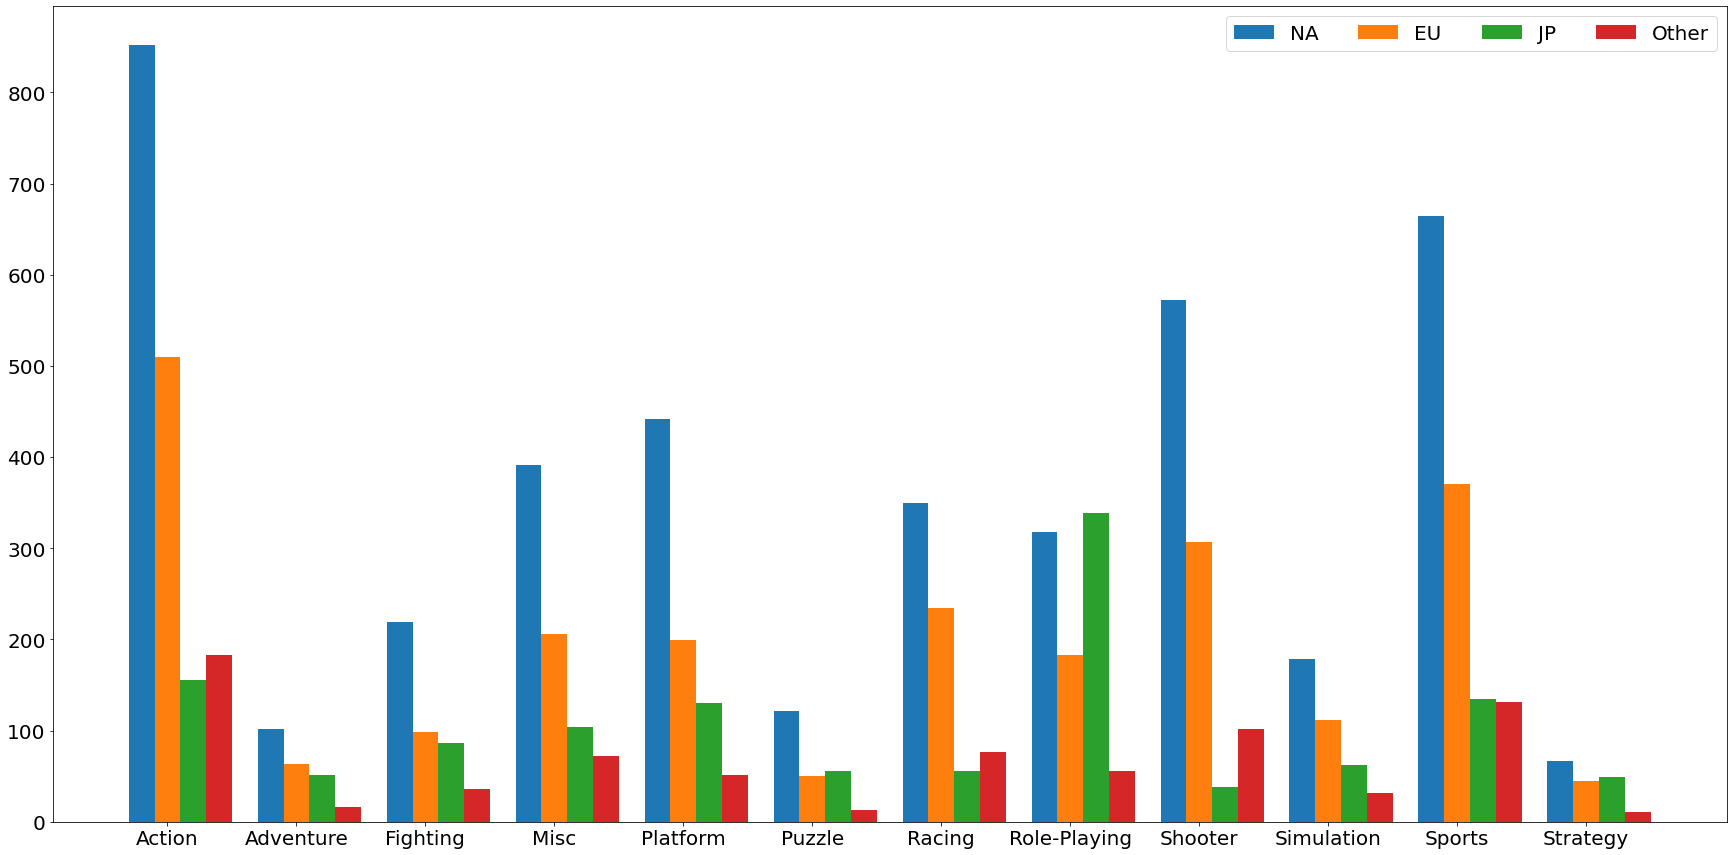

In [ ]:
#장르별 지역 출고량
import numpy as np
import matplotlib.pyplot as plt

genre = pd.pivot_table(df, index = ['Genre'], values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc = 'sum')
les = genre.index
genre['Genre'] = les
index = np.arange(12)
genre.index = index

genre

N = len(genre['Genre'].unique())
index = np.arange(N)
w = 0.20
index


plt.figure(figsize=(30, 15))
plt.bar(index-w, genre['NA_Sales'], width = w, label = 'NA')
plt.bar(index, genre['EU_Sales'], width = w, label = 'EU')
plt.bar(index+w, genre['JP_Sales'], width = w, label = 'JP')
plt.bar(index+w*2, genre['Other_Sales'], width = w, label = 'Other')
plt.legend(ncol=4, fontsize=20)
plt.xticks(index, genre['Genre'], fontsize=20)
plt.yticks(fontsize=20)

plt.show()

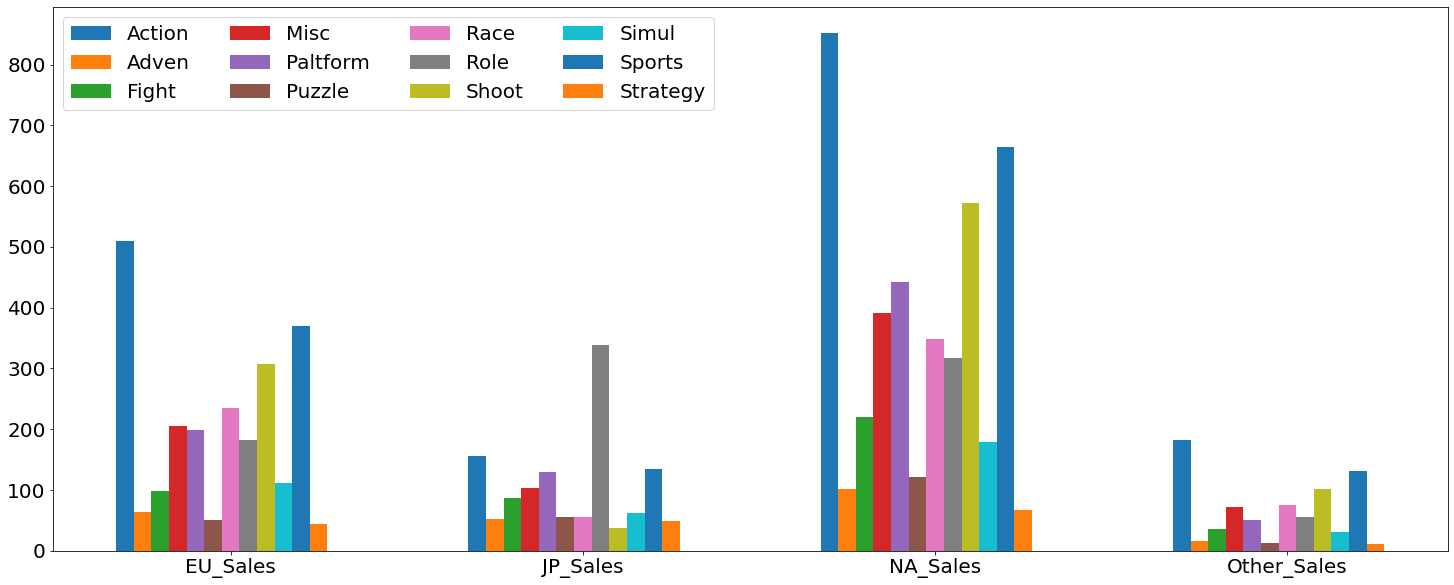

In [ ]:
#지역별 장르 출고량

genre_local = genre.T
genre_local_head = genre_local.loc['Genre']
genre_local.columns = genre_local_head.T
genre_local = genre_local.drop('Genre')

les = genre_local.index
genre_local['local'] = les
index = np.arange(4)
genre_local.index = index

N = len(genre_local['local'].unique())
index = np.arange(N)
w = 0.05


plt.figure(figsize=(25,10))
plt.bar(index-w*6, genre_local['Action'], width = w, label = 'Action')
plt.bar(index-w*5, genre_local['Adventure'], width = w, label = 'Adven')
plt.bar(index-w*4, genre_local['Fighting'], width = w, label = 'Fight')
plt.bar(index-w*3, genre_local['Misc'], width = w, label = 'Misc')
plt.bar(index-w*2, genre_local['Platform'], width = w, label = 'Paltform')
plt.bar(index-w, genre_local['Puzzle'], width = w, label = 'Puzzle')
plt.bar(index, genre_local['Racing'], width = w, label = 'Race')
plt.bar(index+w*1, genre_local['Role-Playing'], width = w, label = 'Role')
plt.bar(index+w*2, genre_local['Shooter'], width = w, label = 'Shoot')
plt.bar(index+w*3, genre_local['Simulation'], width = w, label = 'Simul')
plt.bar(index+w*4, genre_local['Sports'], width = w, label = 'Sports')
plt.bar(index+w*5, genre_local['Strategy'], width = w, label = 'Strategy')
plt.legend(ncol=4, fontsize=20)
plt.xticks(index, genre_local['local'], fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
# 귀무가설 : 지역별로 출고량이 차이가 없다. ( = 비슷하다.)
# 대립가설 : 지역별로 출고량이 차이가 있다. ( = 지약별로 출고량이 차이난다.)
from scipy import stats 

stats.f_oneway(df["EU_Sales"], df["JP_Sales"], df["NA_Sales"], df["Other_Sales"])
# pvalue < 0.05 이기 때문에 귀무가설을 기각한다. 즉 지약별로 출고량이 차이난다.

F_onewayResult(statistic=558.4938566979275, pvalue=0.0)

## 결과

* 북미지역은 Action 장르가 가장 인기 있음.
* 유럽지역은 Action 장르가 가장 인기 있음.
* 일본지역은 Role - Playing 장르가 가장 인기 있음.
* 기타지역은 Action 장르가 가장 인기 있음.

# 2. 연도별 게임 장르의 트렌드

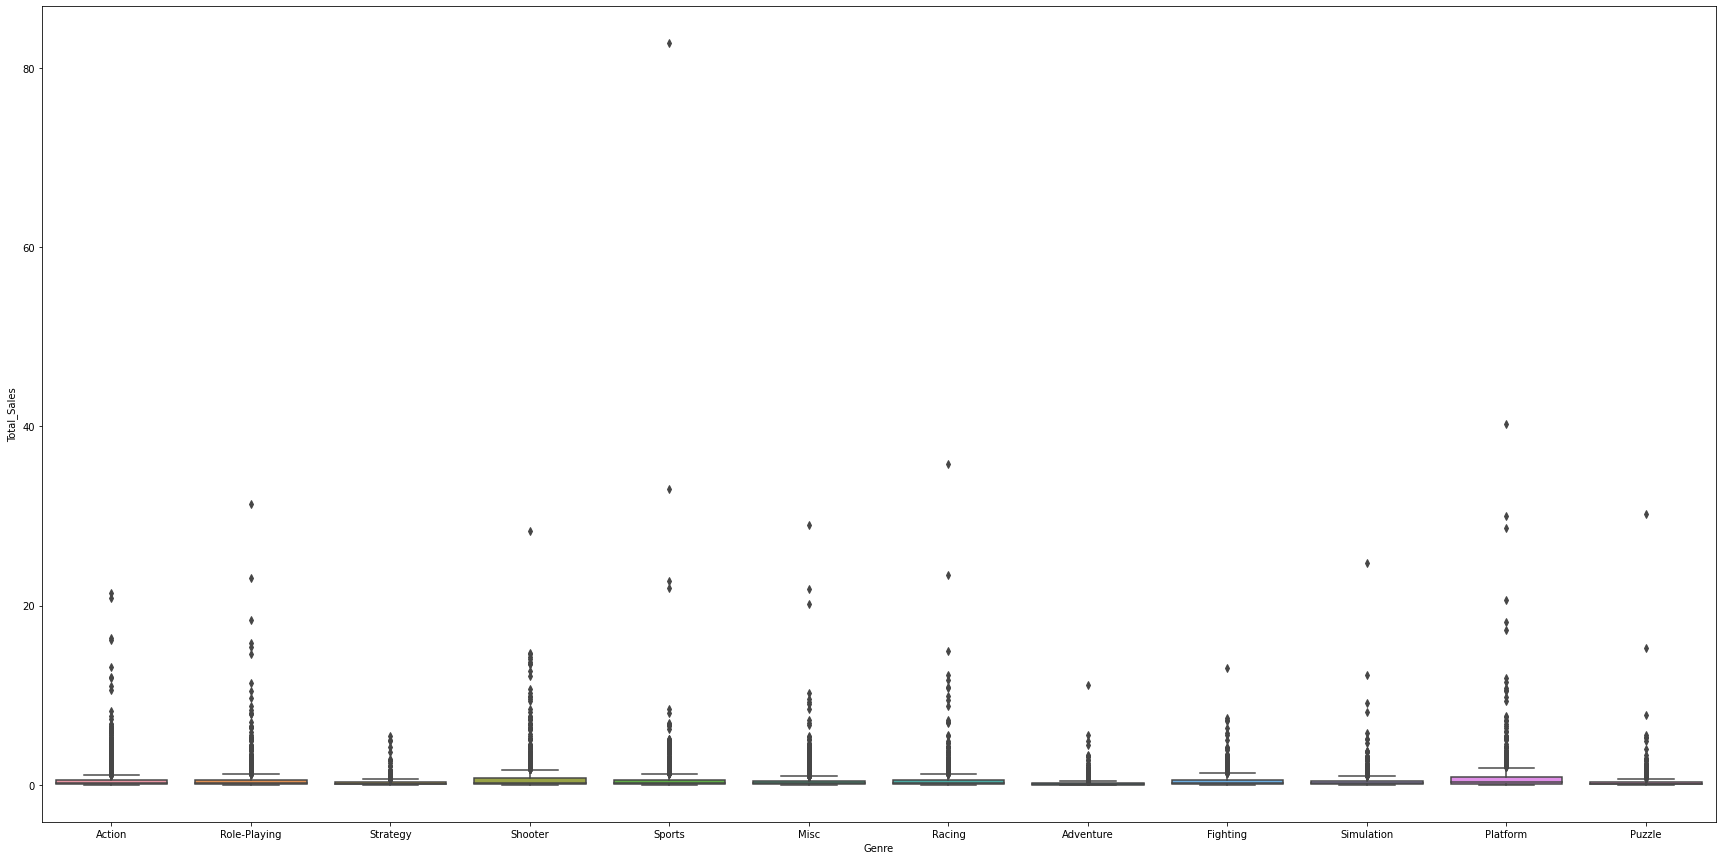

In [ ]:
# 이상치 확인
import seaborn as sns

fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(y = df["Total_Sales"], x = df["Genre"])

plt.show()

In [ ]:
# 이상치 제거
def cut(df):
    IQR = df.quantile(0.75) - df.quantile(0.25)
    return pd.DataFrame([[df.quantile(0.25) - (1.5*IQR), df.quantile(0.75)+(1.5*IQR)]]*df.shape[0], columns = ['lower', 'upper'], index = df.index)
df[['lower', 'upper']] = df.groupby('Genre')['Total_Sales'].apply(cut)
df_drop = df.query('lower <= Total_Sales <= upper').drop(columns = ['lower', 'upper'])
df.drop(columns = ['lower', 'upper'], inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genernation,Platform_Company
1,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,2010,Playstation
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,2010,Playstation
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,2010,Playstation
4,XCOM 2,PS4,2016,Strategy,Take-Two Interactive,0.01,0.02,0.00,0.01,0.04,2010,Playstation
5,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.00,2010,XBox


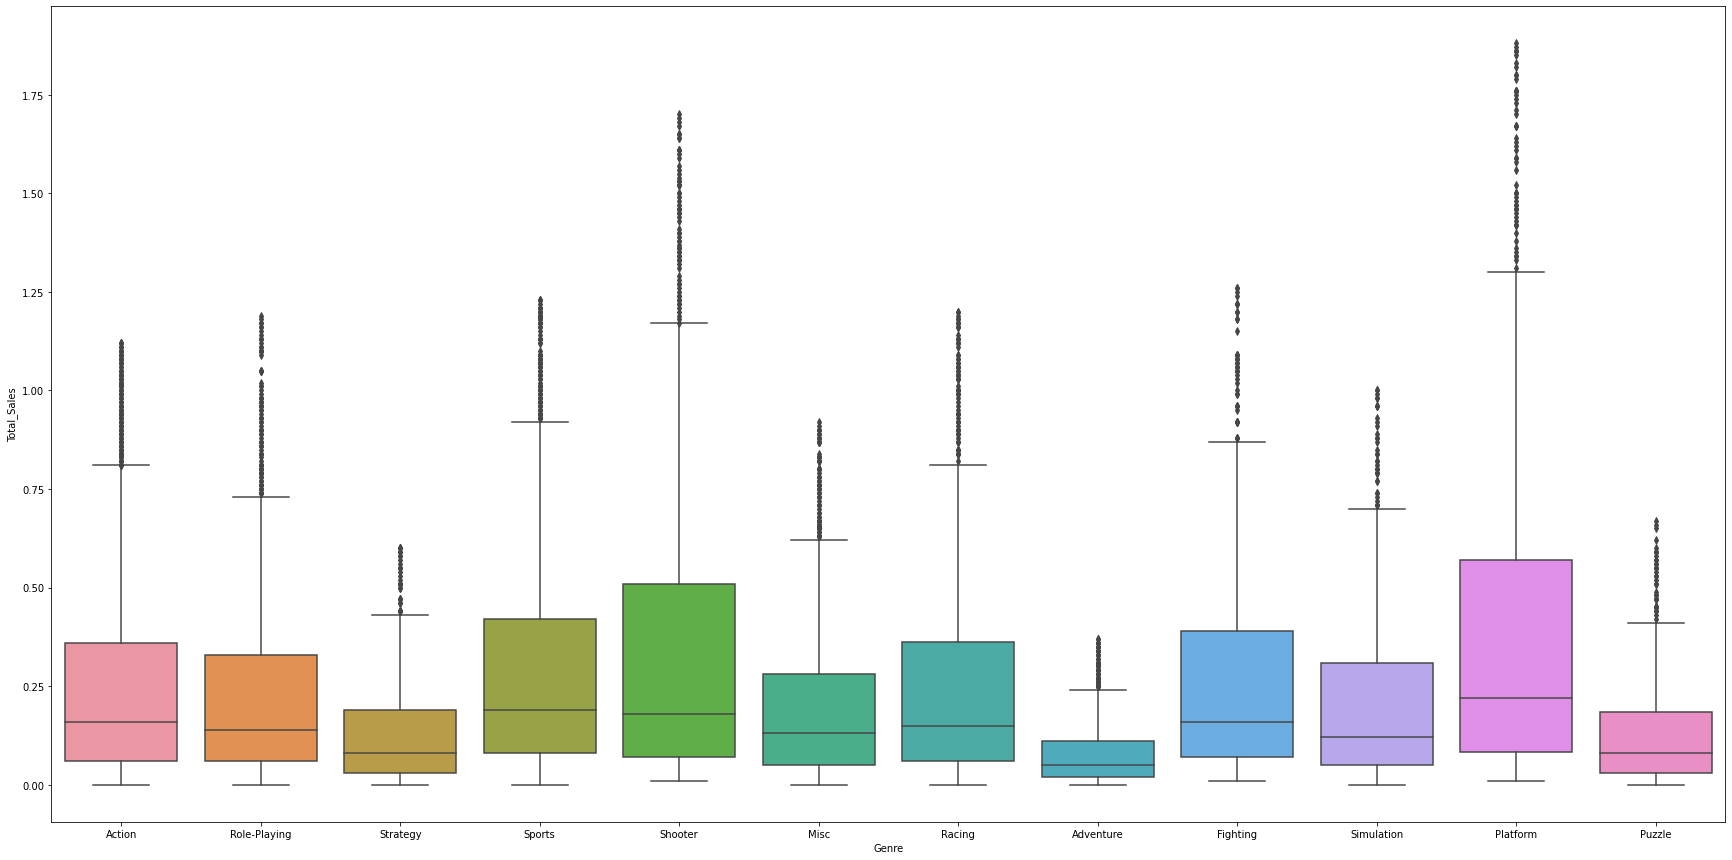

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(y = df_drop.Total_Sales, x = df_drop.Genre)

plt.show()

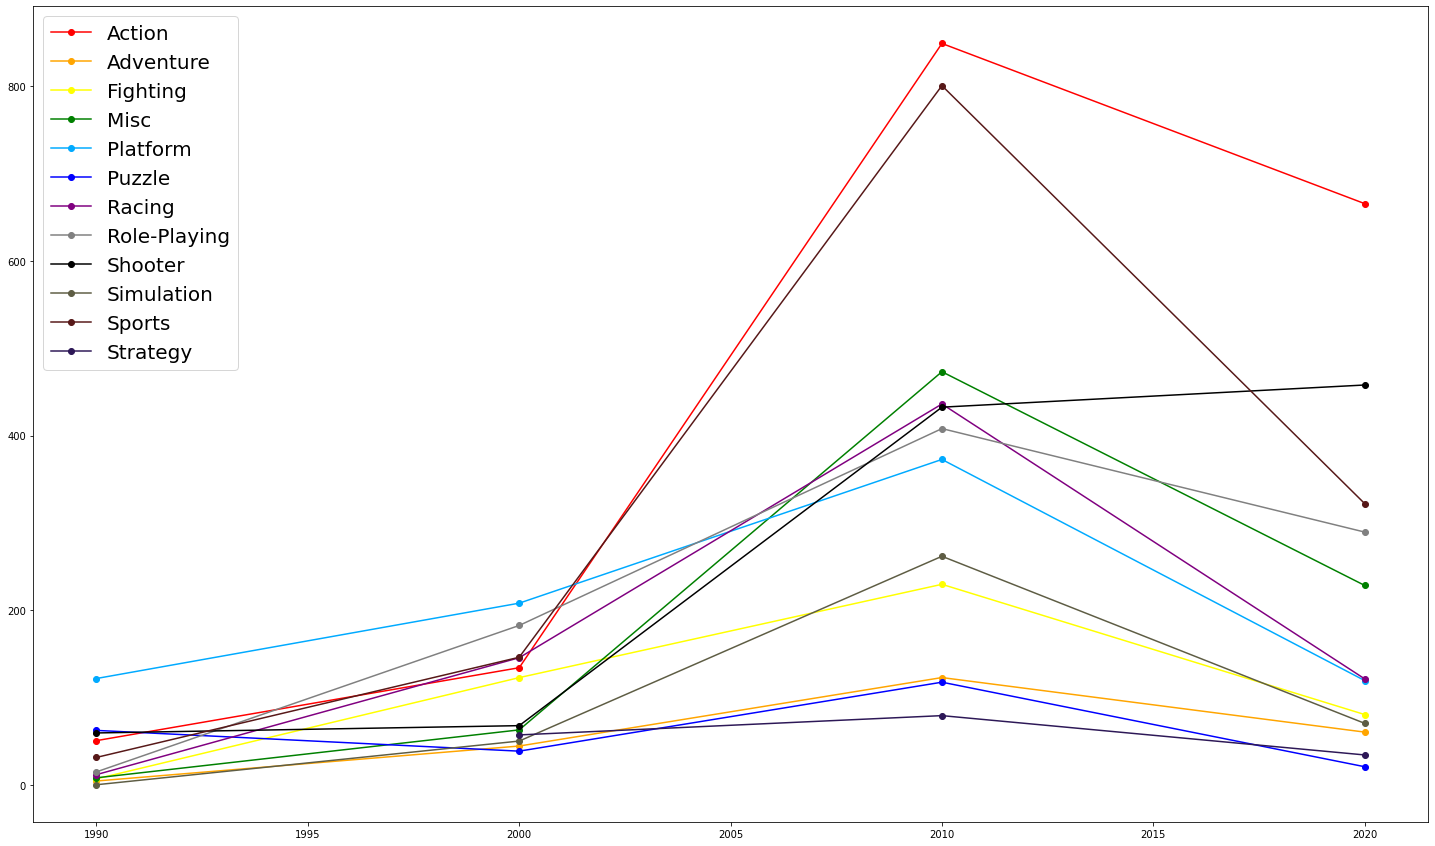

In [ ]:
genre_gene = df.groupby(['Genre', 'Genernation']).Total_Sales.sum().unstack()
genre_gene_list = genre_gene.index
color_list = ["red", "orange", "yellow", "green", "#00aaff", "blue", "purple", "gray", "black", "#5e5d44", "#571818", "#2d1857"]
plt.figure(figsize=(25, 15))
j = 0
for i in genre_gene_list:
    plt.plot(genre_gene.columns + 10, genre_gene.loc[i], label = i, marker = 'o', color = color_list[j])
    j += 1
plt.legend(fontsize = 20)

## 결과

* 1980년 ~ 1990년 사이에는 다른장르에 비해 Platform 장르가 유행함
* 1990년 ~ 2000년 사이에는 많은 장르들이 치고올라오면서  Platform 장르는 1등을 유지했지만 Role - Playing 장르가 많이 치고 올라와 2등을 차지했습니다. 그 뒤로는 Sports, Racing, Action, Fighting 장르가 그 뒤를 이었습니다.
* 2000년 ~ 2010년 사이에는 게임시장이 가장 활발해진 시대로써 그중 Action과 Sports 장르가 급격하게 출고량이 증가했습니다.
* 2010년 ~ 2020년 사이에는 저번 2000년 ~ 2010년 사이보다 출고량이 줄었지만 여전히 Action 장르는 1위를 유지하고 Sports 장르가 많이 줄어 3등이 되고 Shooter 장르가 급격하게 증가해 2위로 올랐습니다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화

* Total_Sales 값이 4 이상인 데이터만 남김

In [ ]:
df_million = df.loc[df.Total_Sales >= 4]
df_million.reset_index(drop = True, inplace = True)
df_million.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genernation,Platform_Company
0,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78,2010,Playstation
1,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,1.96,1.69,0.08,0.74,4.47,2010,Playstation
2,Splatoon,WiiU,2015,Shooter,Nintendo,1.55,1.15,1.44,0.43,4.57,2010,Nintendo
3,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,2010,Playstation
4,Fallout 4,XOne,2015,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09,2010,XBox


### Total_Sales 값에 따른 출고량 누적합 그래프

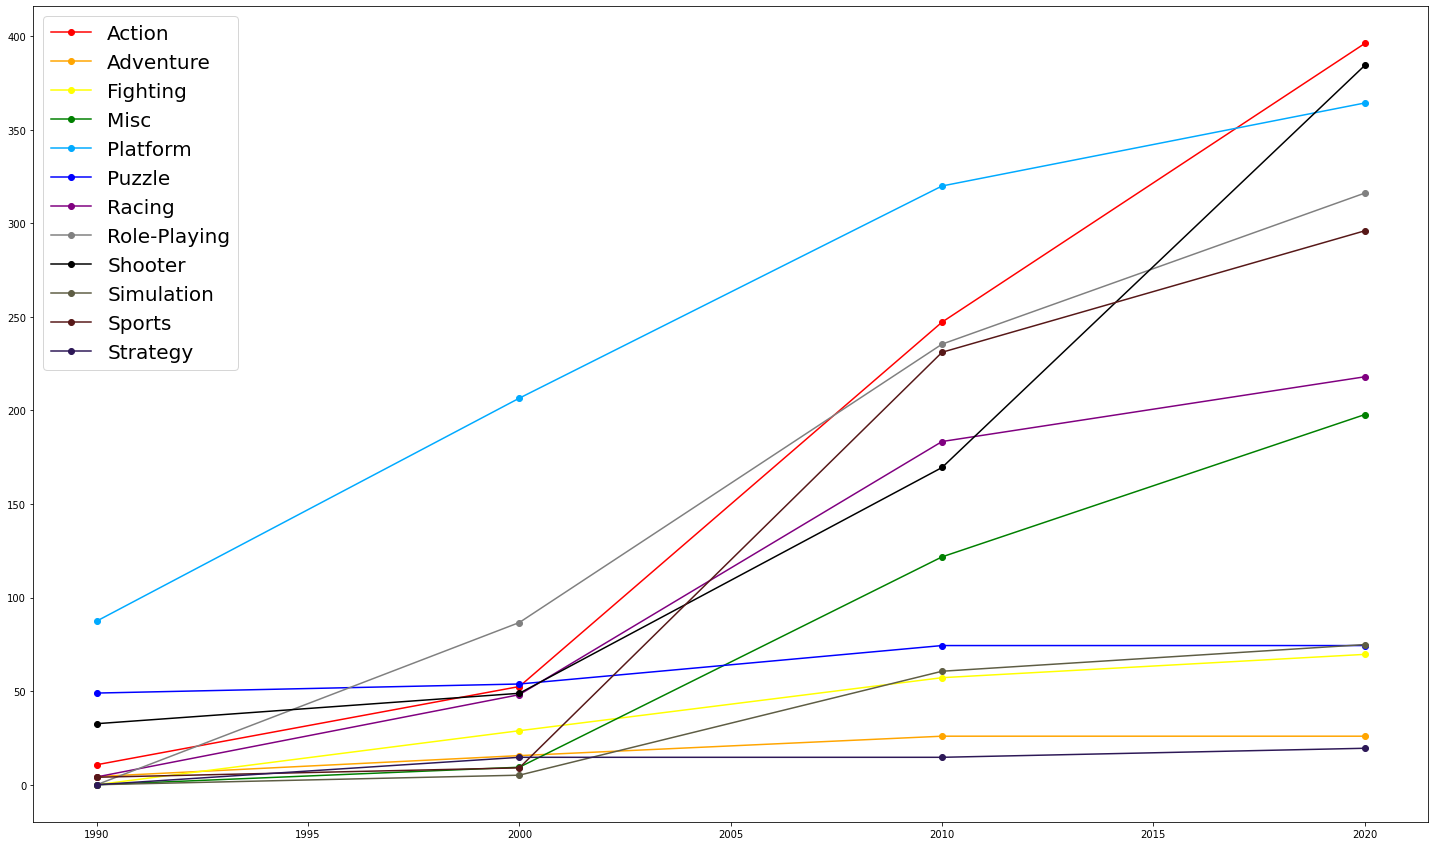

In [ ]:
Total_genre_gene_mil = df_million.groupby(['Genre', 'Genernation']).Total_Sales.sum().unstack()
Total_genre_gene_mil = Total_genre_gene_mil.fillna(0)
Total_genre_gene_mil_list = Total_genre_gene_mil.index
val = np.cumsum(Total_genre_gene_mil, axis = 1)
color_list = ["red", "orange", "yellow", "green", "#00aaff", "blue", "purple", "gray", "black", "#5e5d44", "#571818", "#2d1857"]
plt.figure(figsize=(25, 15))
j = 0
for i in Total_genre_gene_mil_list:
    plt.plot(val.columns + 10, val.loc[i], label = i, marker = 'o', color = color_list[j])
    j += 1
plt.legend(fontsize = 20)

### NA_Sales 값에 따른 출고량 누적합 그래프

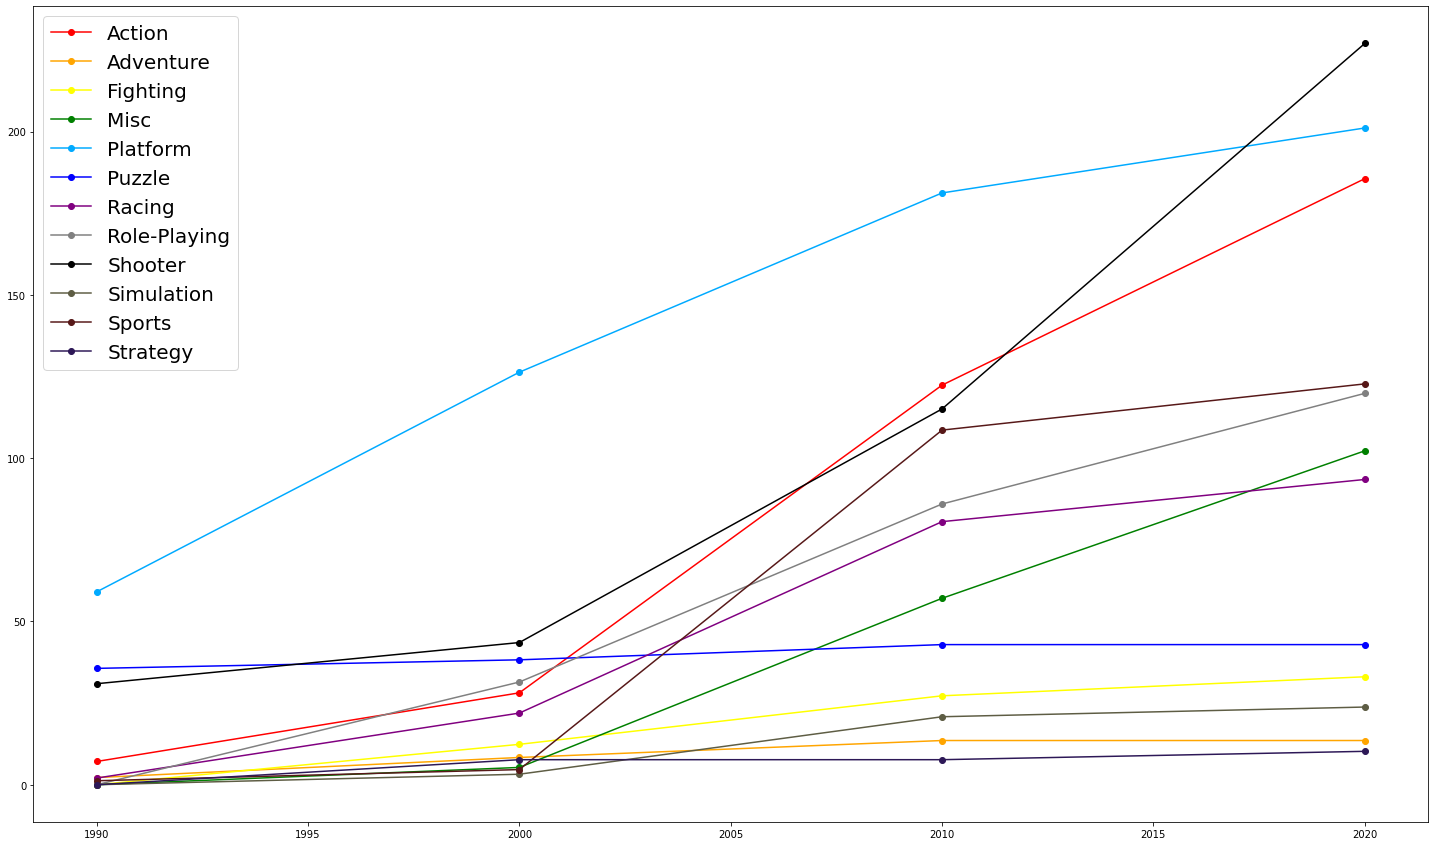

In [ ]:
NA_genre_gene_mil = df_million.groupby(['Genre', 'Genernation']).NA_Sales.sum().unstack()
NA_genre_gene_mil = NA_genre_gene_mil.fillna(0)
NA_genre_gene_mil_list = NA_genre_gene_mil.index
val = np.cumsum(NA_genre_gene_mil, axis = 1)
color_list = ["red", "orange", "yellow", "green", "#00aaff", "blue", "purple", "gray", "black", "#5e5d44", "#571818", "#2d1857"]
plt.figure(figsize=(25, 15))
j = 0
for i in NA_genre_gene_mil_list:
    plt.plot(val.columns + 10, val.loc[i], label = i, marker = 'o', color = color_list[j])
    j += 1
plt.legend(fontsize = 20)

### EU_Sales 값에 따른 출고량 누적합 그래프

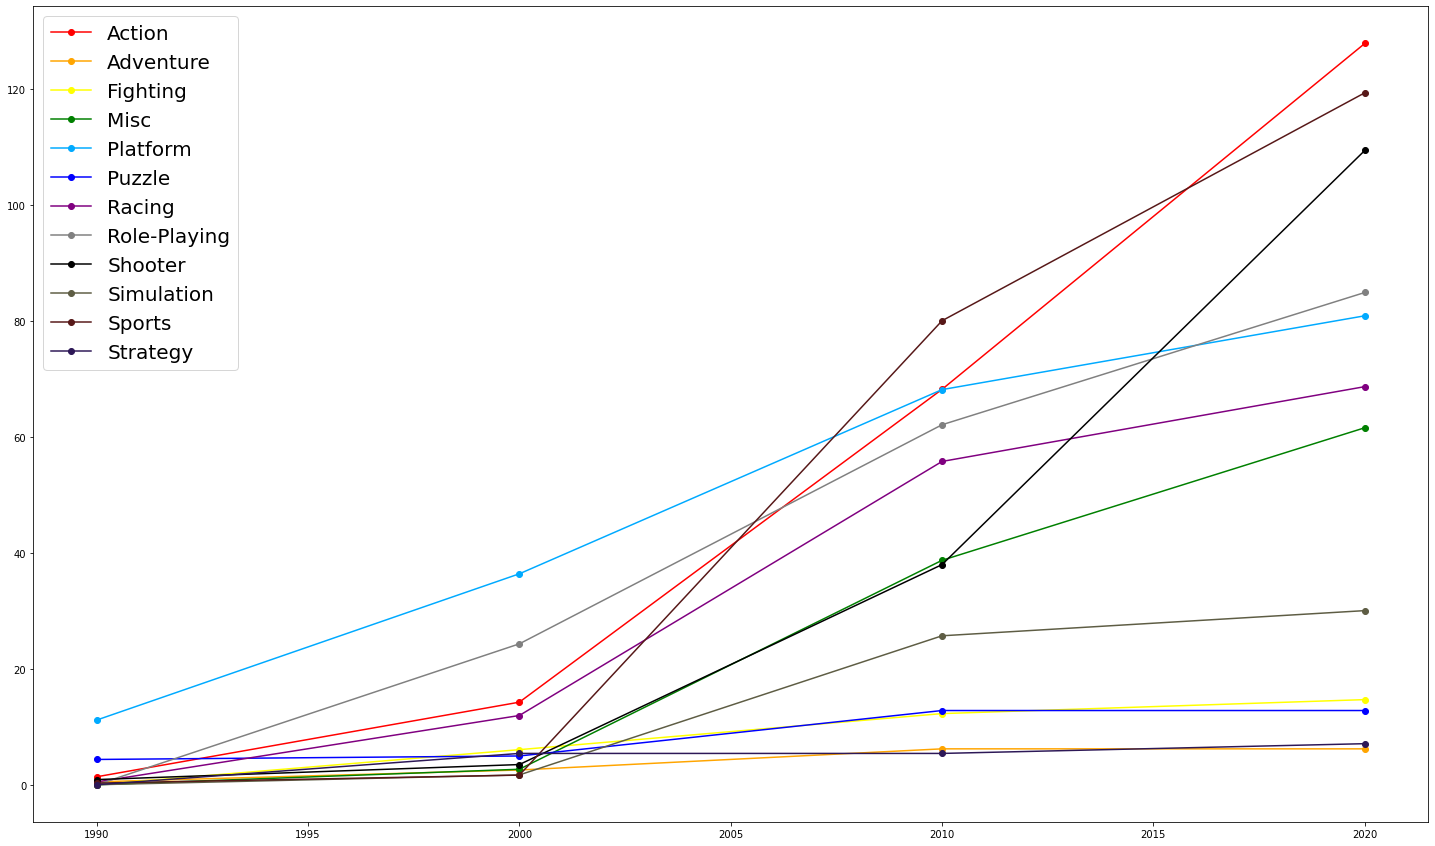

In [ ]:
EU_genre_gene_mil = df_million.groupby(['Genre', 'Genernation']).EU_Sales.sum().unstack()
EU_genre_gene_mil = EU_genre_gene_mil.fillna(0)
EU_genre_gene_mil_list = EU_genre_gene_mil.index
val = np.cumsum(EU_genre_gene_mil, axis = 1)
color_list = ["red", "orange", "yellow", "green", "#00aaff", "blue", "purple", "gray", "black", "#5e5d44", "#571818", "#2d1857"]
plt.figure(figsize=(25, 15))
j = 0
for i in EU_genre_gene_mil_list:
    plt.plot(val.columns + 10, val.loc[i], label = i, marker = 'o', color = color_list[j])
    j += 1
plt.legend(fontsize = 20)

### JP_Sales 값에 따른 출고량 누적합 그래프

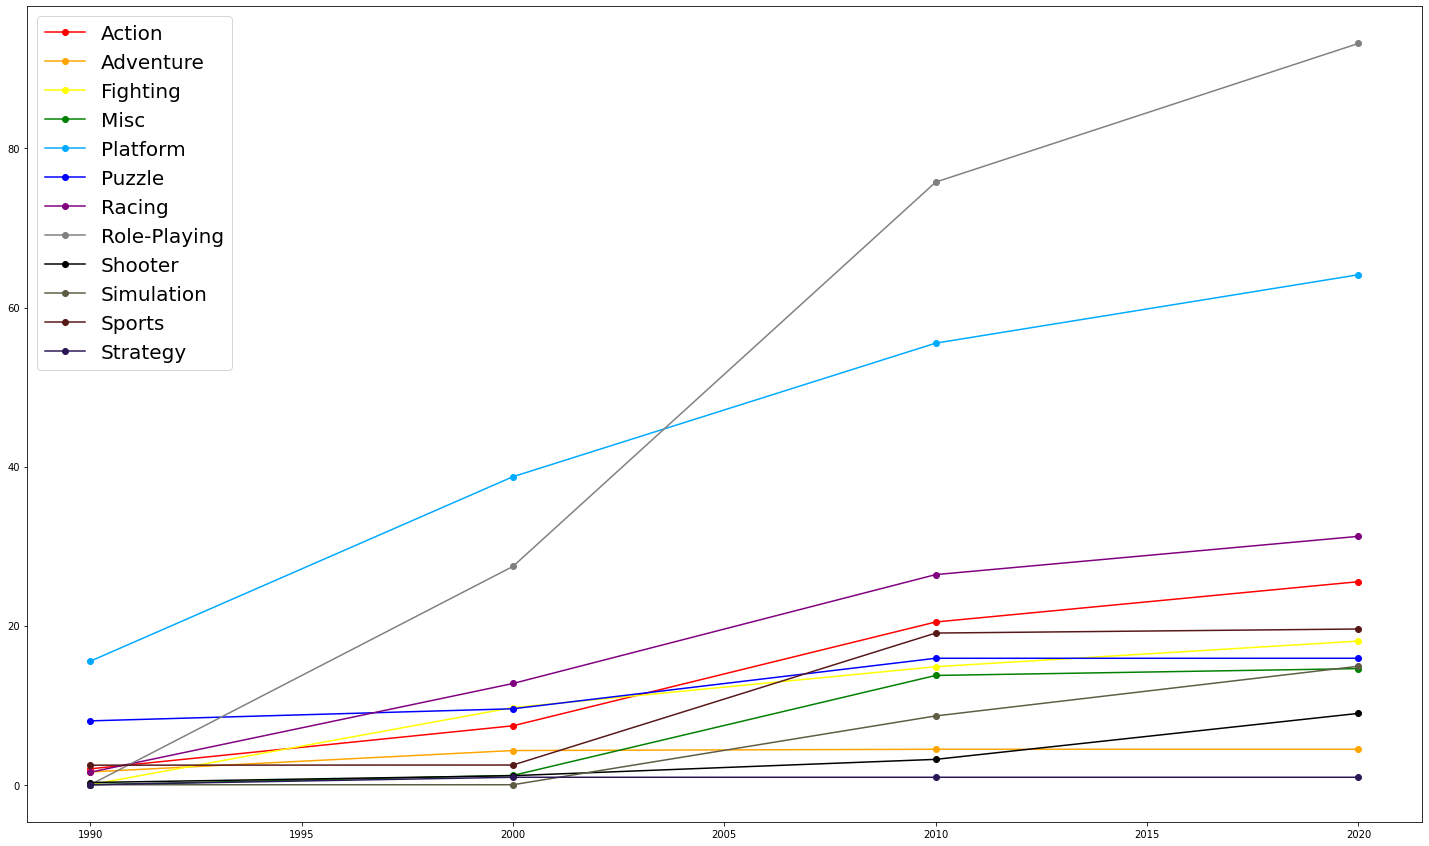

In [ ]:
JP_genre_gene_mil = df_million.groupby(['Genre', 'Genernation']).JP_Sales.sum().unstack()
JP_genre_gene_mil = JP_genre_gene_mil.fillna(0)
JP_genre_gene_mil_list = JP_genre_gene_mil.index
val = np.cumsum(JP_genre_gene_mil, axis = 1)
color_list = ["red", "orange", "yellow", "green", "#00aaff", "blue", "purple", "gray", "black", "#5e5d44", "#571818", "#2d1857"]
plt.figure(figsize=(25, 15))
j = 0
for i in JP_genre_gene_mil_list:
    plt.plot(val.columns + 10, val.loc[i], label = i, marker = 'o', color = color_list[j])
    j += 1
plt.legend(fontsize = 20)

### Other_Sales 값에 따른 출고량 누적합 그래프

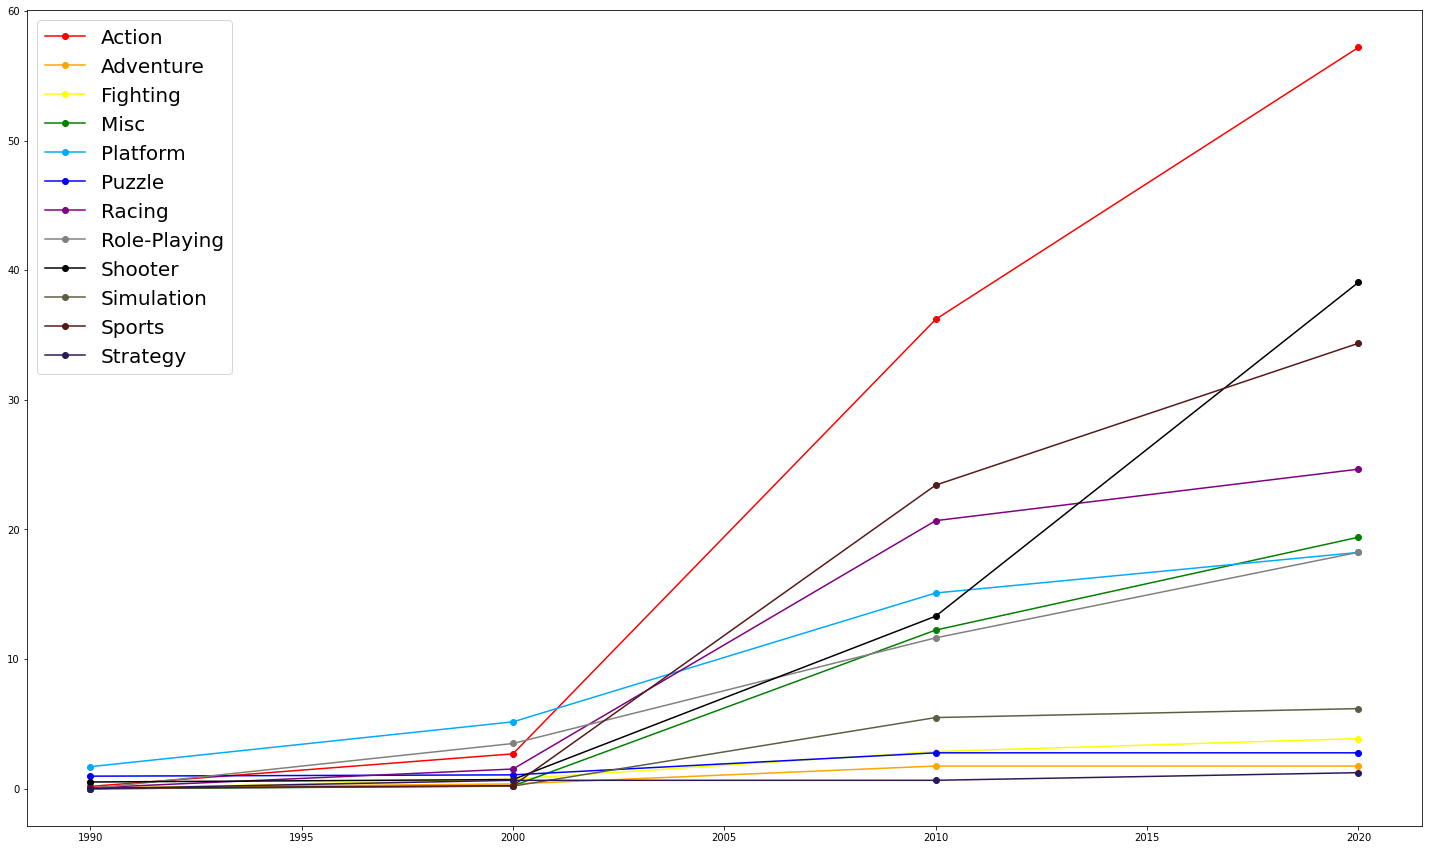

In [ ]:
Other_genre_gene_mil = df_million.groupby(['Genre', 'Genernation']).Other_Sales.sum().unstack()
Other_genre_gene_mil = Other_genre_gene_mil.fillna(0)
Other_genre_gene_mil_list = Other_genre_gene_mil.index
val = np.cumsum(Other_genre_gene_mil, axis = 1)
color_list = ["red", "orange", "yellow", "green", "#00aaff", "blue", "purple", "gray", "black", "#5e5d44", "#571818", "#2d1857"]
plt.figure(figsize=(25, 15))
j = 0
for i in Other_genre_gene_mil_list:
    plt.plot(val.columns + 10, val.loc[i], label = i, marker = 'o', color = color_list[j])
    j += 1
plt.legend(fontsize = 20)

## 결과

* 총 출고량이 4인 이상의 약 300개 정도의 데이터로 분석을 했을 때 Shooter 장르만이 유일하게 상승곡선을 타고 있고 나머지 장르는 약간의 하강곡선을 띄고 있음.
* 북미지역에서는 모든지역과 비슷하게 Shooter 장르만이 유일하게 상승곡선을 타고 있고 나머지 장르는 약간의 하강곡선을 띄고 있다. 
* 북미지역에서는 누적 출고량이 Shooter, Platform, Action 순으로 배치되어 있다.
* 북미지역에서는 Platform 장르가 다른 지역에 비해 인기가 많다.
* 유럽지역에서는 Shooter 장르와 Action 장르가 상승곡선을 보이고 나머지 장르는 약간의 하강곡선을 띄고 있다.
* 유럽지역에서는 누적 출고량이 Action, Sports, Shooter순으로 배치되어 있다.
* 기타지역에서는 Shooter 장르와 Role - Playing 장르가 상승곡선을 보이고 나머지 장르는 약간의 하강곡선을 띄고 있다.
* 기타지역에서는 누적 출고량이 Action, Shooter, Sports 순으로 배치되어 있다.


# 4. Platform 회사에 따른 지역별 출고량


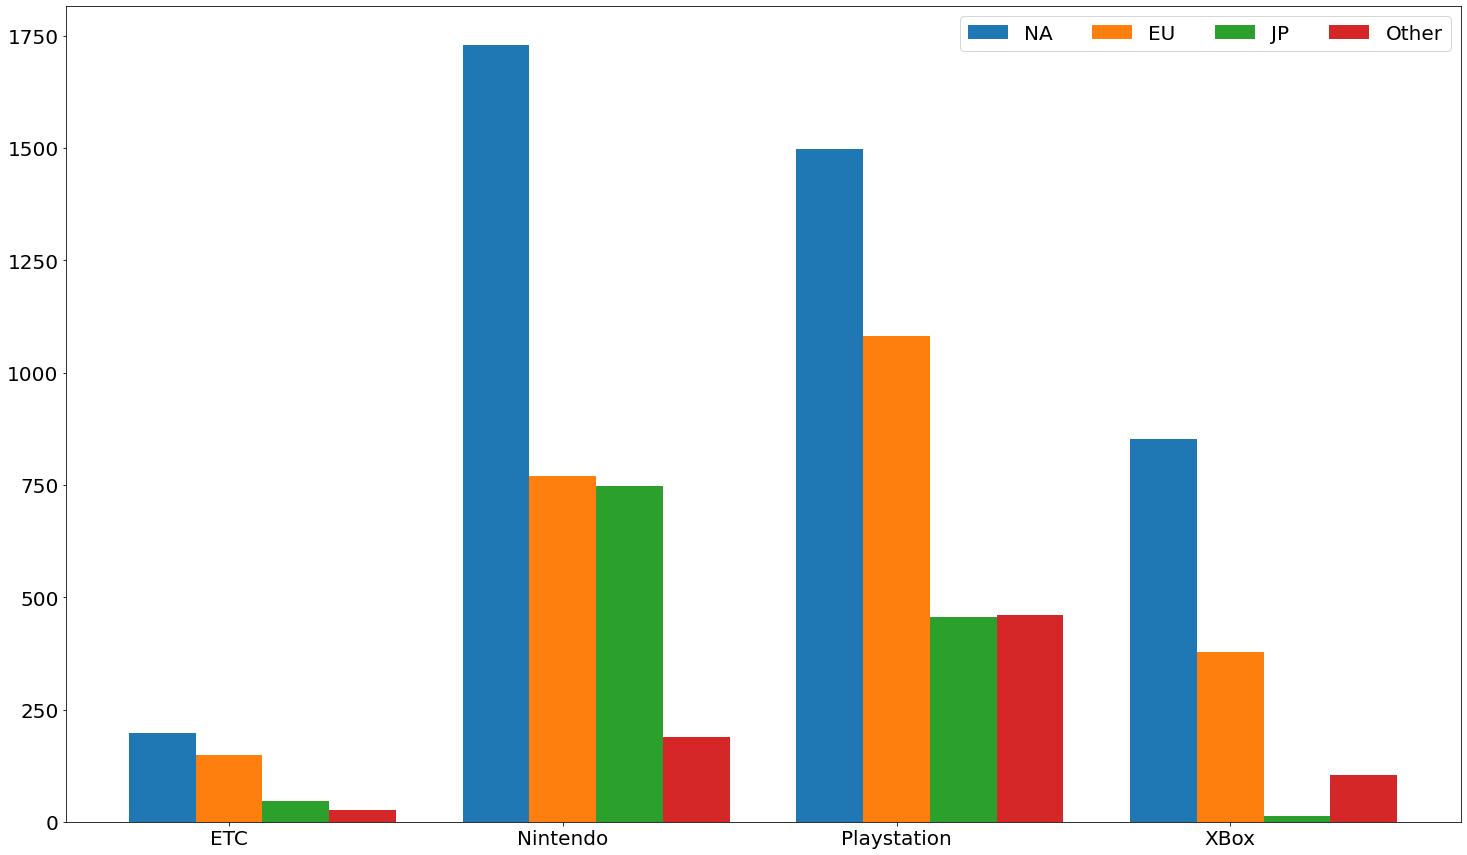

In [ ]:
Platform = pd.pivot_table(df, index = ['Platform_Company'], values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc = 'sum')
les_2 = Platform.index
Platform['Platform_Company'] = les_2
index_2 = np.arange(4)
Platform.index = index_2

M = len(Platform['Platform_Company'].unique())
index_2 = np.arange(M)
w = 0.20


plt.figure(figsize=(25, 15))
plt.bar(index_2-w, Platform['NA_Sales'], width = w, label = 'NA')
plt.bar(index_2, Platform['EU_Sales'], width = w, label = 'EU')
plt.bar(index_2+w, Platform['JP_Sales'], width = w, label = 'JP')
plt.bar(index_2+w*2, Platform['Other_Sales'], width = w, label = 'Other')
plt.legend(ncol=4, fontsize=20)
plt.xticks(index_2, Platform['Platform_Company'], fontsize=20)
plt.yticks(fontsize=20)

plt.show()

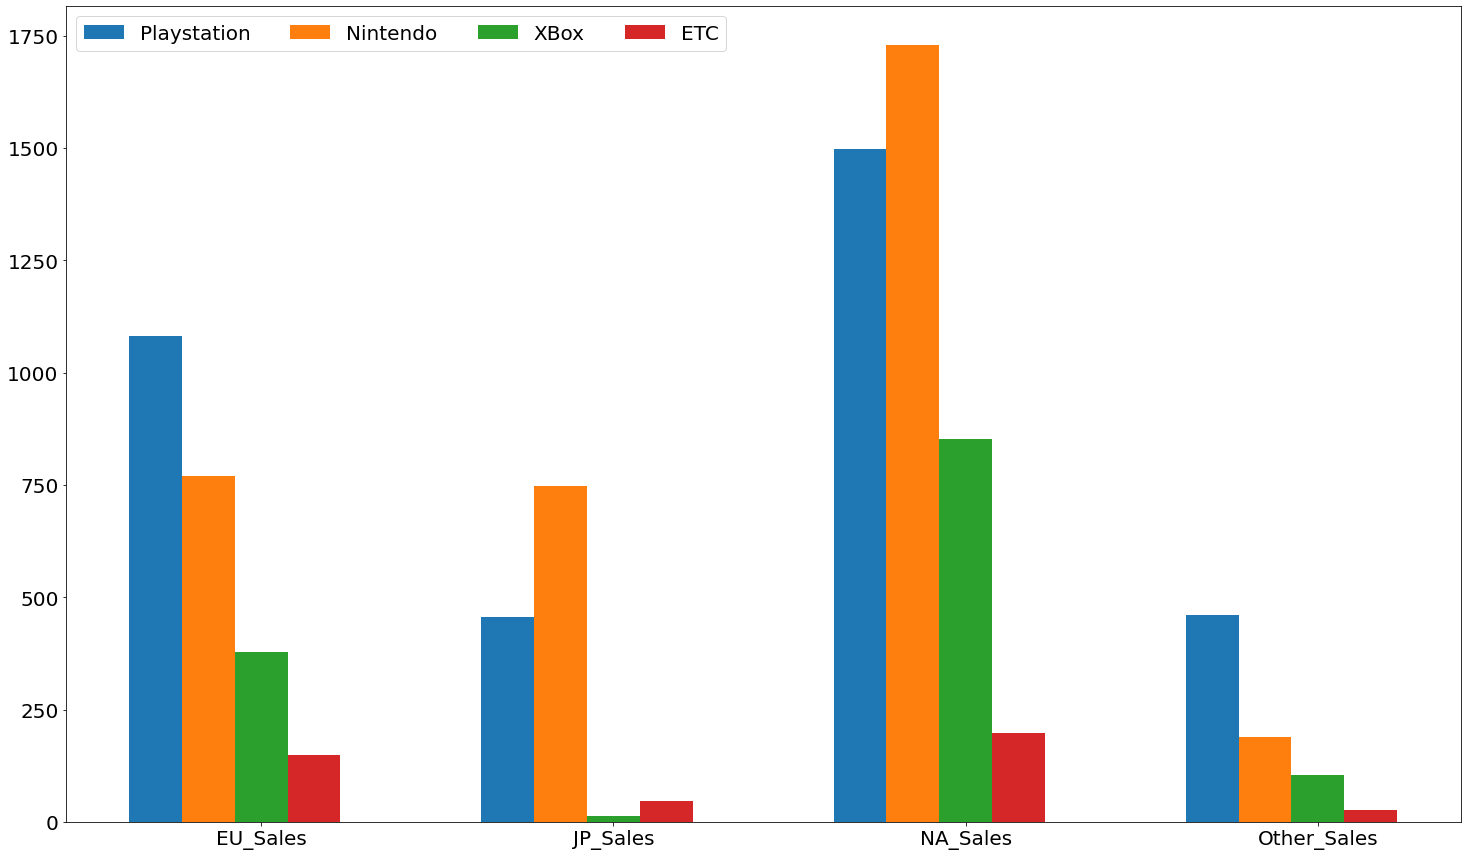

In [ ]:
#지역별 플랫폼 회사 출고량

Platform_local = Platform.T
Platform_local_head = Platform_local.loc['Platform_Company']
Platform_local.columns = Platform_local_head.T
Platform_local = Platform_local.drop('Platform_Company')

les_2 = Platform_local.index
Platform_local['local'] = les_2
index_2 = np.arange(4)
Platform_local.index = index_2

M = len(Platform_local['local'].unique())
index_2 = np.arange(M)
w = 0.15


plt.figure(figsize=(25,15))

plt.bar(index_2-w*2, Platform_local['Playstation'], width = w, label = 'Playstation')
plt.bar(index_2-w, Platform_local['Nintendo'], width = w, label = 'Nintendo')
plt.bar(index_2, Platform_local['XBox'], width = w, label = 'XBox')
plt.bar(index_2+w*1, Platform_local['ETC'], width = w, label = 'ETC')
plt.legend(ncol=4, fontsize=20)
plt.xticks(index_2, Platform_local['local'], fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## 결과
* 지역별로 선호하는 Platform 회사가 다르다.
* 유럽지역에서는 Playstation 회사가 가장 출고량이 많고 그 뒤로 Nintendo, XBox, 기타 회사가 출고량이 많다.
* 일본지역에서는 일본회사인 Nintendo 회사가 가장 출고량이 많고 그 뒤로 Playstation, 기타, XBox 회사 순으로 출고량이 많다. 
* 일본지역의 경우 XBox 회사와 기타 회사의 출고량은 거의 없는 정도로 Nintendo 와 Playstation 두 회사가 독점하고 있는 형태이다.
* 북미지역에서는 Nintendo 회사가 가장 출고량이 많고 그 뒤로 Playstation, XBox, 기타 회사 순으로 출고량이 많다.
* 기타지역에서는 Playstation 회사가 가장 출고량이 많고 그 뒤로 Nintendo, XBox, 기타 회사가 출고량이 많다.
* 전체지역중 출고량 비율중 가장 많은 부분을 차지하는 지역은 북미지역이다.


# 5. 연도별 Platform Company 트렌드

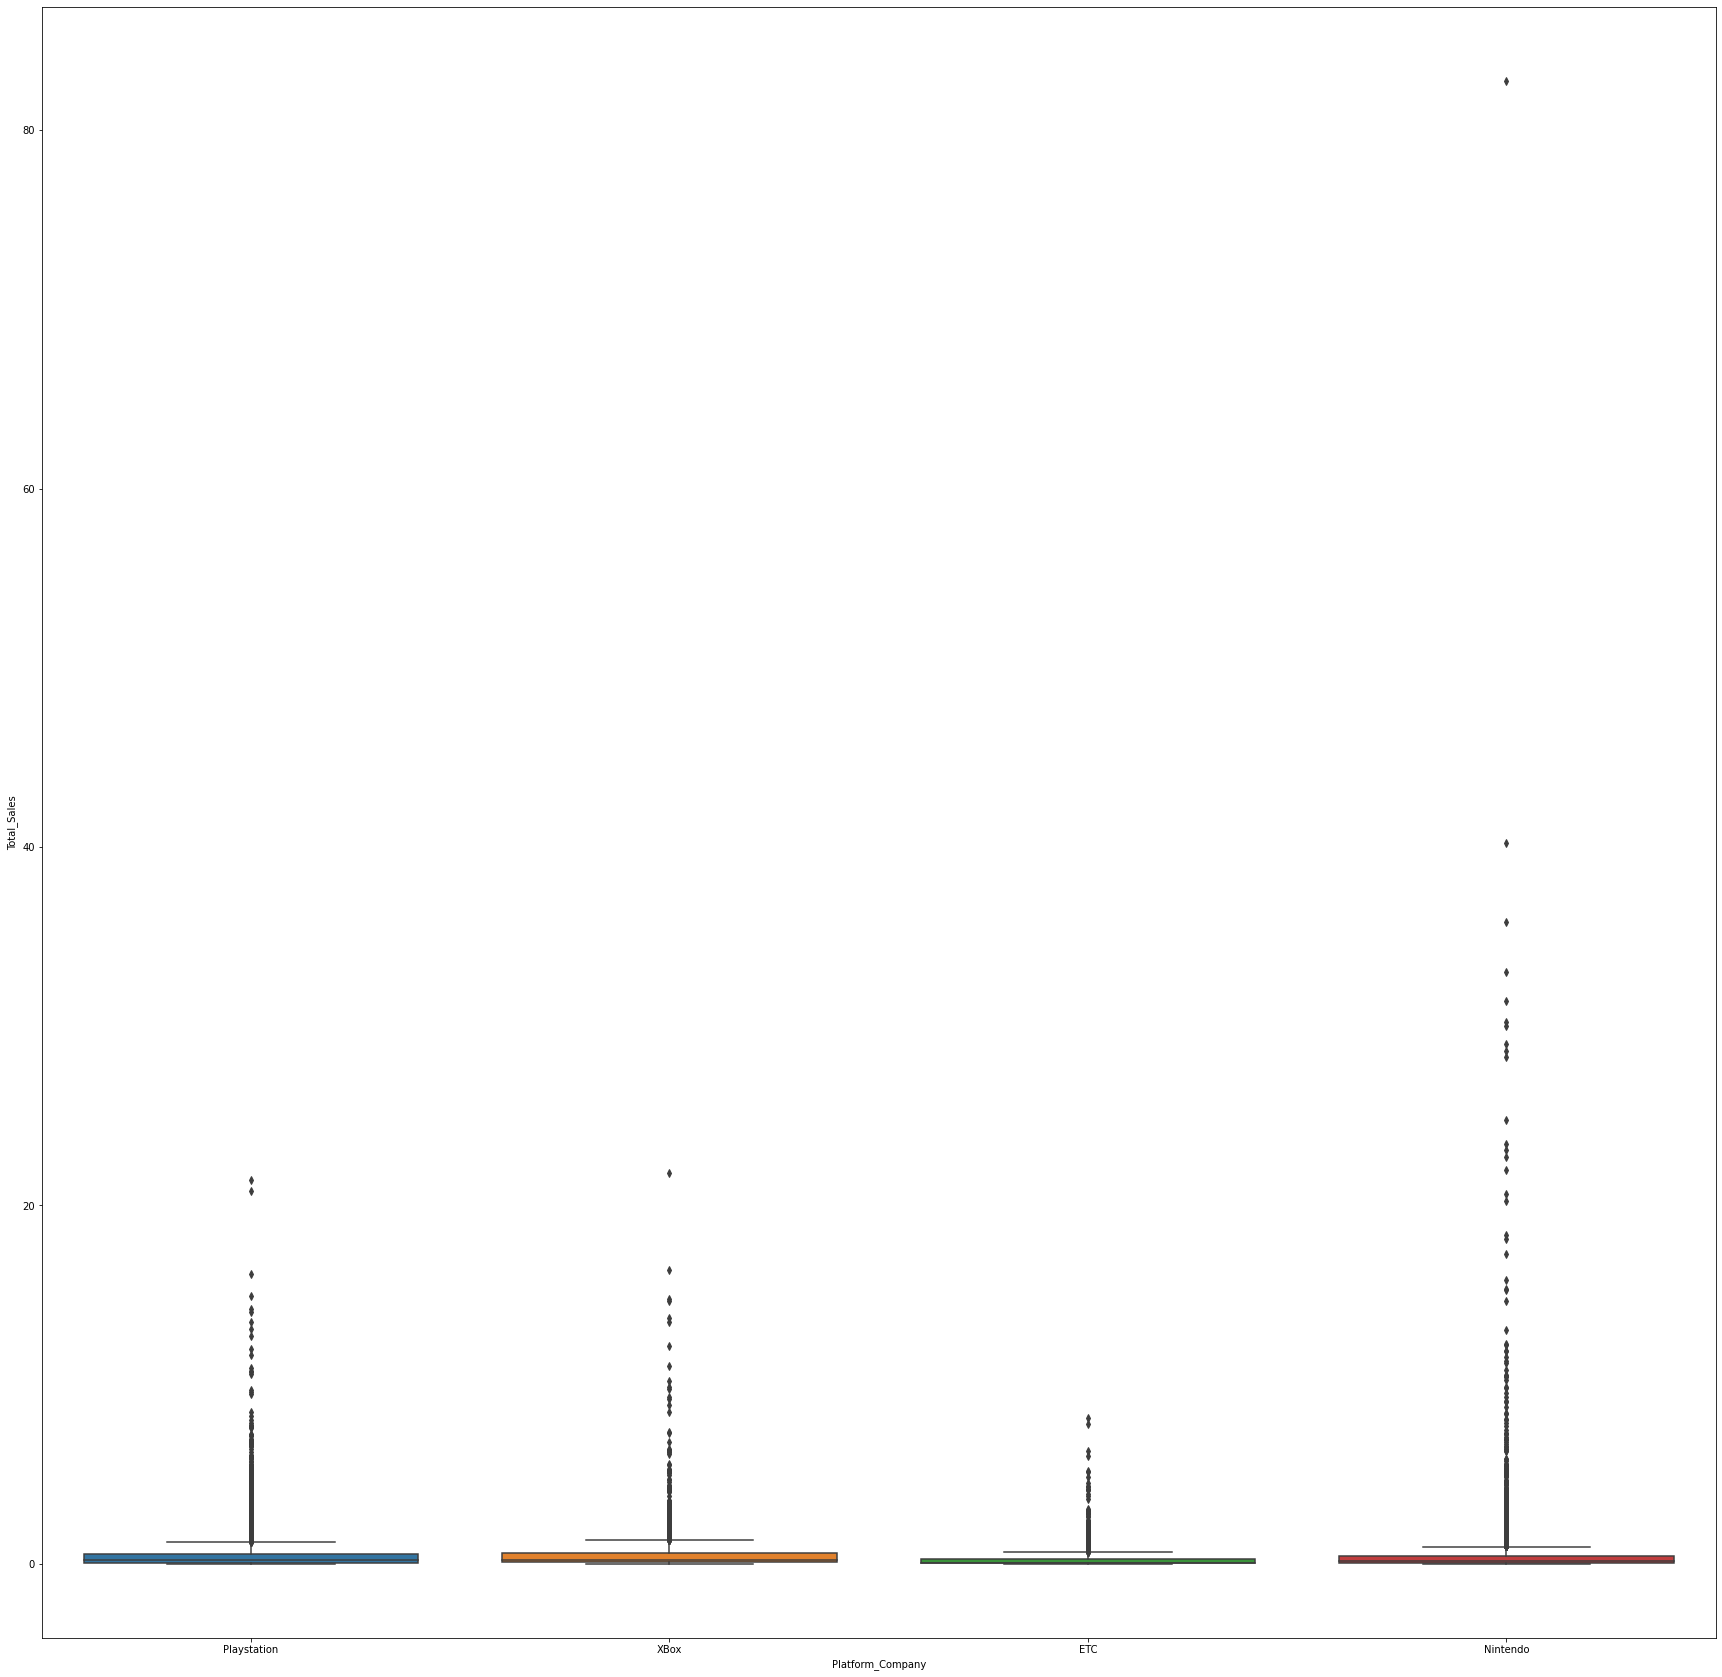

In [ ]:
# 이상치 확인
import seaborn as sns

fig, ax = plt.subplots(figsize=(30, 30))
sns.boxplot(x = df["Platform_Company"], y = df["Total_Sales"])

plt.show()

In [ ]:
# 이상치 제거
def cut(df):
    IQR = df.quantile(0.75) - df.quantile(0.25)
    return pd.DataFrame([[df.quantile(0.25) - (1.5*IQR), df.quantile(0.75)+(1.5*IQR)]]*df.shape[0], columns = ['lower', 'upper'], index = df.index)
df[['lower', 'upper']] = df.groupby('Genre')['Total_Sales'].apply(cut)
df_drop_2 = df.query('lower <= Total_Sales <= upper').drop(columns = ['lower', 'upper'])
df.drop(columns = ['lower', 'upper'], inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genernation,Platform_Company
1,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,2010,Playstation
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,2010,Playstation
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,2010,Playstation
4,XCOM 2,PS4,2016,Strategy,Take-Two Interactive,0.01,0.02,0.00,0.01,0.04,2010,Playstation
5,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.00,2010,XBox


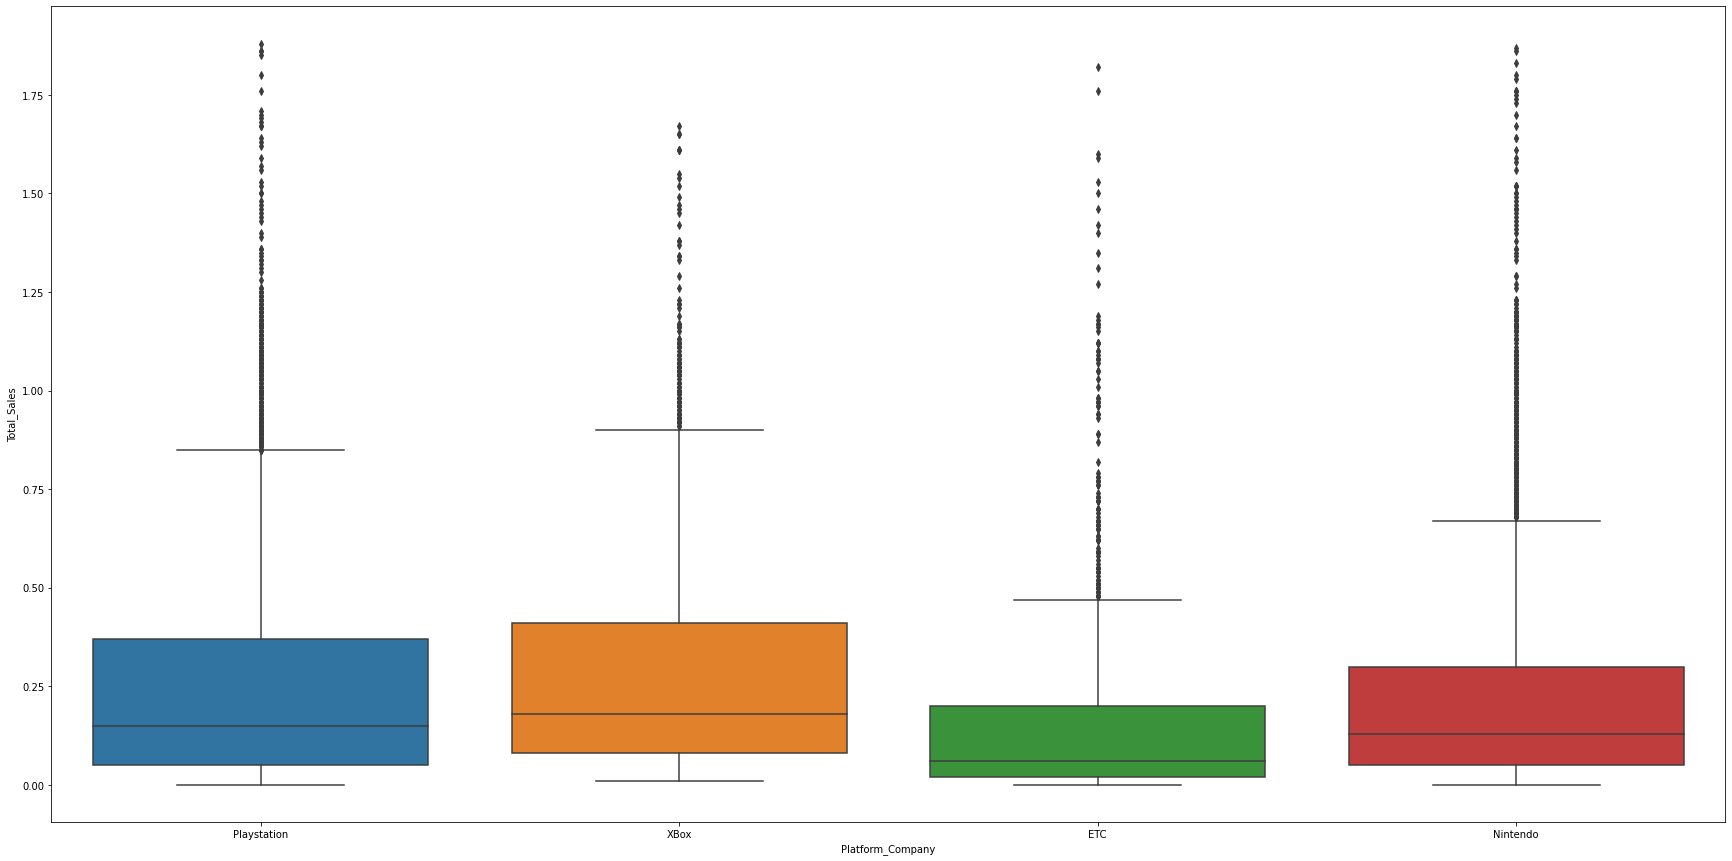

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(y = df_drop_2.Total_Sales, x = df_drop_2.Platform_Company)

plt.show()

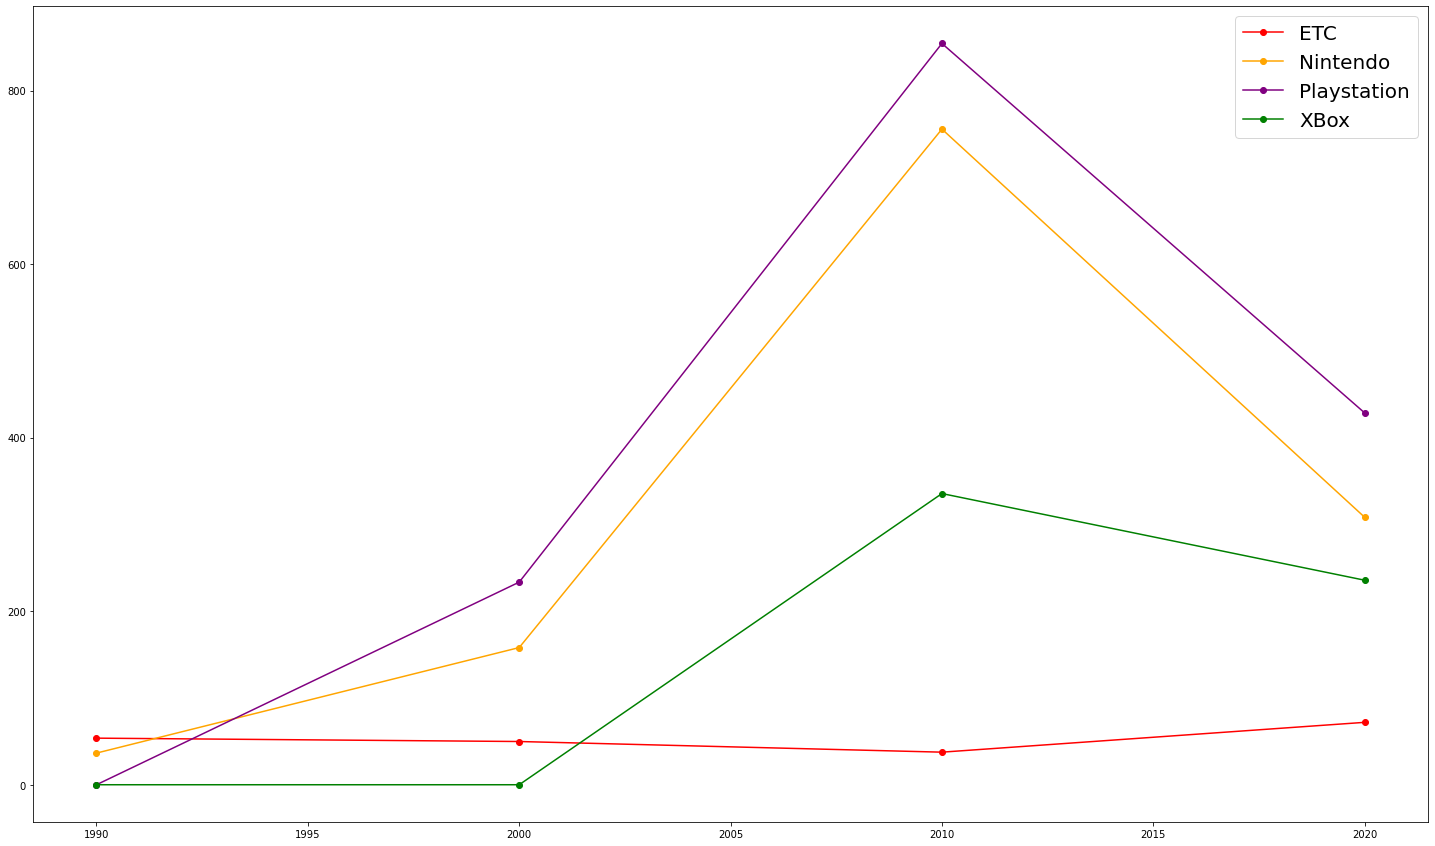

In [ ]:
Platform_gene = df_drop_2.groupby(['Platform_Company', 'Genernation']).Total_Sales.sum().unstack()
Platform_gene = Platform_gene.fillna(0)
Platform_gene_list = Platform_gene.index
color_list = ["red", "orange", "purple", "green"]
plt.figure(figsize=(25, 15))
j = 0
for i in Platform_gene_list:
    plt.plot(Platform_gene.columns + 10, Platform_gene.loc[i], label = i, marker = 'o', color = color_list[j])
    j += 1
plt.legend(fontsize = 20)

## 결과
* 1980년 ~ 1990년 사이에는 Nintendo 와 기타 회사만 출고량이 존재했다. 
* 1990년 ~ 2000년 사이에는 Playstation 회사가 출고되기 시작하면서 바로 가장많은 출고량 회사가 되고 얼마 차이 나지 않게 Nintendo 회사가 2위를 차지하고 기타 회사들이 3위를 했다. 아직까지 XBox 회사의 출고는 이루어지지 않았다.
* 2000년 ~ 2010년 사이에는 게임시장이 가장 활발해진 시대로써 Playstation 과 Nintendo 두 회사가 쌍두마차를 이루고 그 뒤로 XBox 회사가 출고되기 시작하면서 3위를 차지했다.
* 2010년 ~ 2020년 사이에는 저번 2000년 ~ 2010년 사이보다 출고량이 줄었지만 여전히 Playstation 회사가 1위를 하고 있고 Nintendo 회사가 2위를 차지했고, 그 뒤로 XBox 회사가 3위를 차지했다. 세 회사 사이의 출고량 격차가 많이 줄어들었다.


# 6. 향후 출시 계획

앞선 분석들을 통해서 게임 시장이 2000년대에 비해 많이 줄기는 했지만 아직까지 출고량이 괜찮은 상태이고 현재 코로나19시대에서 외부활동보다는 집에서 할 수 있는 게임 시장이 다시 활발해질 가능성이 많기 때문에 게임을 출시하기 위해서 일단 게임장르는 2000년대부터 꾸준하게 상승하고 있는 Shooter 장르나 꾸준함을 유지하고 있는 Action 이나 Sports 장르를 선택해야하고 또 게임 플랫폼 회사 같은 경우에는 세 회사 사이의 출고량 격차가 많이 줄어들어 세회사 모두 . 그리고 현재까지 가장 많은 게임이 거래되고 있는 지역은 북미지역으로 북미지역이나 유럽지역에 투자를 하는것이 가장 좋은 투자라고 분석된다.
* 이를 통합해 볼때 가장 좋은 출시는 Shooter 장르의 게임을 Playstation 플랫폼으로 북미지역에 출시하는 것이 가장 좋은 출시 계획이다.
* Shooter 게임 중에서는 현재 Shooter 장르 Top 10을 봤을 때 2위 부터 9위까지 모두 Call of Duty 가 차지하고 있는걸로 보아 게임 시리즈는 Call of Duty가 가장 좋은 출시 인거 같다.

In [ ]:
df2 = df[df["Genre"] == "Shooter"]
df3 = df2.sort_values('Total_Sales', ascending = False).reset_index(drop = True)
df3.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genernation,Platform_Company
0,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980,Nintendo
1,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,2010,XBox
2,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,2010,XBox
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,2010,Playstation
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,2010,Playstation
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,2010,XBox
6,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.52,2000,XBox
7,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,2010,Playstation
8,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,2010,Playstation
9,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14,2000,XBox
